# Test de SAM sur le dataset COCO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch torchvision
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-c9oem8c6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-c9oem8c6
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=fda28e488e35a6e3601d68050bb04e98e9f8c35aae3f0d8a07416cc70f89eab6
  Stored in directory: /tmp/pip-ephem-wheel-cache-95tm6owz/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


### Importation de la version SAM vit_h

In [ ]:
from segment_anything import SamPredictor, sam_model_registry
import torch

sam_checkpoint = "/content/drive/MyDrive/Colab Notebooks/Mod_sys_vis/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


### Importation du dataset COCO (subset val2017)

In [ ]:
!pip install pycocotools
from pycocotools.coco import COCO

coco_path = "/content/drive/MyDrive/Colab Notebooks/Mod_sys_vis/COCO/annotations/instances_val2017.json"
coco = COCO(coco_path)


loading annotations into memory...
Done (t=2.59s)
creating index...
index created!


### Exemple de visualisation d'image du dataset COCO

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Image Info: {'license': 3, 'file_name': '000000532481.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jp

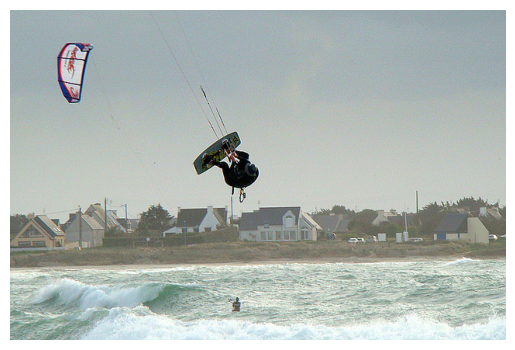

Annotations: [{'segmentation': [[253.85, 187.23, 250.82, 193.01, 255.22, 199.6, 260.99, 202.35, 270.89, 204.55, 273.64, 211.15, 277.21, 222.15, 284.09, 228.47, 293.71, 232.04, 303.06, 233.14, 311.03, 231.77, 317.9, 224.9, 320.93, 215.55, 320.1, 206.48, 315.43, 199.05, 310.2, 193.56, 308.83, 186.13, 299.48, 182.28, 294.81, 182.01, 288.49, 175.96, 284.09, 169.36, 273.64, 168.26, 273.09, 172.94, 277.49, 177.34, 283.81, 181.46, 287.94, 184.48, 283.26, 188.06, 281.61, 190.53, 283.54, 196.58, 284.36, 202.9, 279.96, 198.5, 272.54, 194.93, 266.77, 195.21, 265.12, 194.38, 259.89, 189.43, 254.12, 186.96]], 'area': 2188.0864999999994, 'iscrowd': 0, 'image_id': 532481, 'bbox': [250.82, 168.26, 70.11, 64.88], 'category_id': 1, 'id': 508910}, {'segmentation': [[446.65, 301.37, 437.02, 302.04, 436.02, 301.54, 435.35, 297.72, 438.34, 296.89, 438.68, 294.73, 447.15, 294.23, 448.81, 298.05, 448.48, 301.04]], 'area': 82.66089999999997, 'iscrowd': 0, 'image_id': 532481, 'bbox': [435.35, 294.23, 13.46, 7.8

In [ ]:
# Liste des catégories disponibles dans COCO
categories = coco.loadCats(coco.getCatIds())
print("Categories:", [cat['name'] for cat in categories])

# Récupérer les IDs d'images contenant une catégorie spécifique (ex: "person")
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)

img_id = imgIds[0]
img_info = coco.loadImgs(img_id)[0]
print("Image Info:", img_info)

img_path = f"/content/drive/MyDrive/Colab Notebooks/Mod_sys_vis/COCO/val2017/{img_info['file_name']}"

image = Image.open(img_path)
plt.imshow(image)
plt.axis('off')
plt.show()

# Charger les annotations associées à cette image
annIds = coco.getAnnIds(imgIds=img_id)
annotations = coco.loadAnns(annIds)
print("Annotations:", annotations)


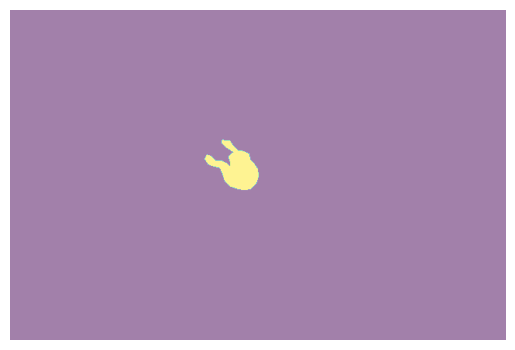

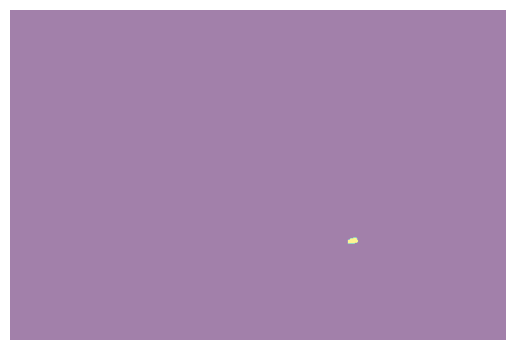

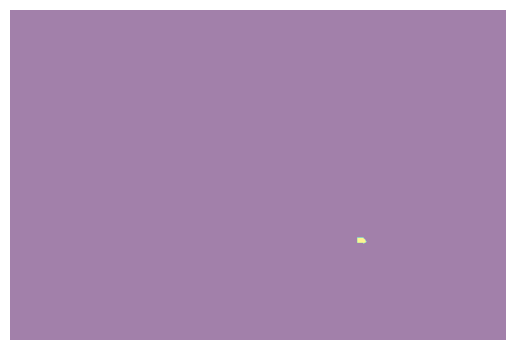

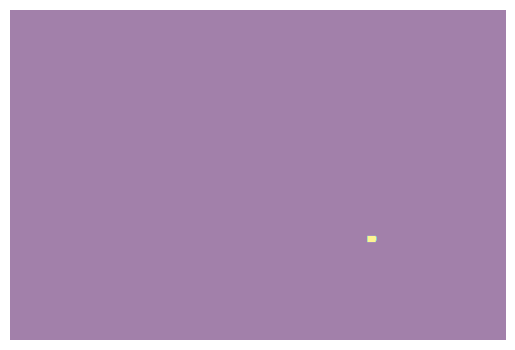

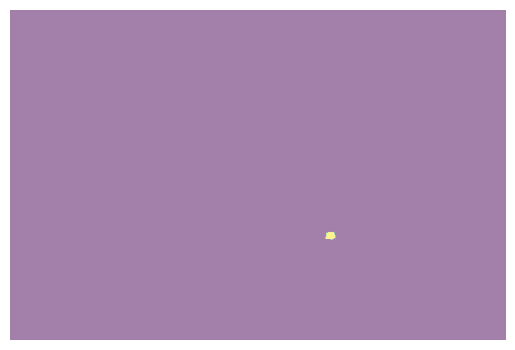

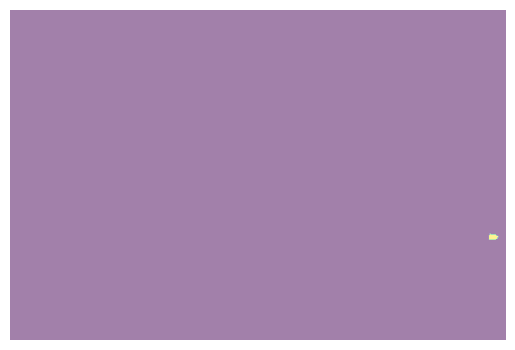

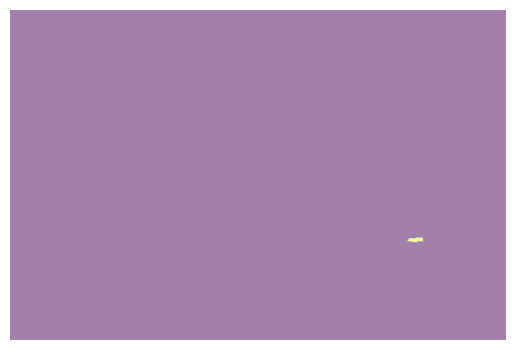

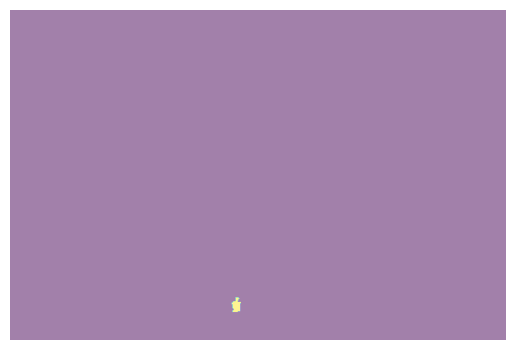

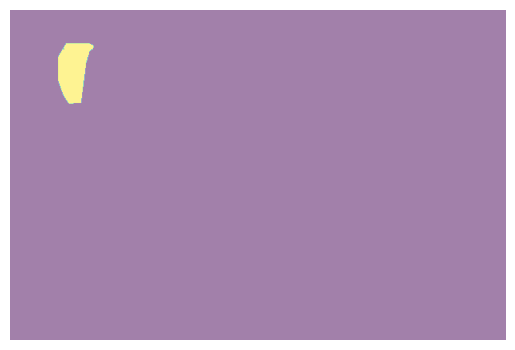

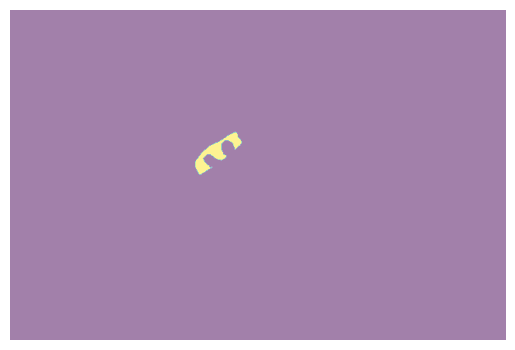

In [ ]:
from pycocotools import mask

for ann in annotations:
    binary_mask = coco.annToMask(ann)
    plt.imshow(binary_mask, alpha=0.5)
    plt.axis('off')
    plt.show()

### Calcul de l'IoU des masks calculés par SAM sur COCO

In [ ]:
results = []
for img_id in coco.getImgIds():
    img_info = coco.loadImgs(img_id)[0]
    img_path = f"/content/drive/MyDrive/Colab Notebooks/Mod_sys_vis/COCO/val2017/{img_info['file_name']}"
    image = Image.open(img_path).convert("RGB")
    image = np.array(image)
    predictor.set_image(image)

    # Récupérer les annotations pour cette image
    annIds = coco.getAnnIds(imgIds=img_id)
    annotations = coco.loadAnns(annIds)

    for ann in annotations:
        bbox = ann['bbox']
        input_box = np.array([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]])
        masks, scores, _ = predictor.predict(box=input_box, multimask_output=False)

        # Calculer l'IoU avec l'annotation COCO
        gt_mask = coco.annToMask(ann)
        predicted_mask = masks[0]
        iou_score = np.sum(gt_mask * predicted_mask) / np.sum((gt_mask + predicted_mask) > 0)
        #print(iou_score)
        results.append(iou_score)

average_iou = np.mean(results)
print(f"Average IoU over all images: {average_iou:.4f}")


Average IoU over all images: 0.7746
